In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Read the Airbnb
df = pd.read_csv('/content/drive/MyDrive/Source_Code/VOIS PROJECT DATASET.csv', low_memory = False)

In [42]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [44]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [45]:
# Neighbourhood group was 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [84]:
#Drop duplicate records
df.drop_duplicates(inplace = True)

#drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis = 1, inplace = True)

#Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].str.replace('$', '', regex= False)
df['service fee'] = df['service fee'].str.replace('$', '', regex= False)

#Rename the price and service fee columns to include a dollar sign
df.rename(columns = {'price': 'price_$', 'service fee': 'service_fee_$'}, inplace = True)

#Remove commas from price and service fee columns
df['price_$'] = df['price_$'].astype(str).str.replace(',', '', regex= False)
df['service_fee_$'] = df['service_fee_$'].astype(str).str.replace(',', '', regex= False)


#Drop all records with missing values
df.dropna(inplace = True)

#Change all mismatched dattypes to the appropriate once.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

#Correct the spelling of 'brookln' in 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

#Get rid of outliers in the 'availability 365'column data
df = df.drop(df[df['availability 365'] > 500].index)

In [85]:
df.duplicated().value_counts()

,count
False,83818


In [86]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83818.000000,83818.000000,83818.000000,83618.000000,83589.000000,83818.000000,83818.000000,83818,83818.000000,83818.000000,83818.000000,83818.000000
mean,40.727357,-73.948500,2012.490217,626.345476,125.233033,7.436028,32.241893,2019-06-09 15:43:35.924980224,1.375827,3.278902,7.049691,141.755411
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,2007.000000,341.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721330,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930800,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056315,0.050343,5.760865,331.793162,66.354589,28.119584,51.901397,NaN,1.749397,1.283646,29.564849,133.399179


In [87]:
#What are the different property types in the datset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44369
Private room,37684
Shared room,1655
Hotel room,110


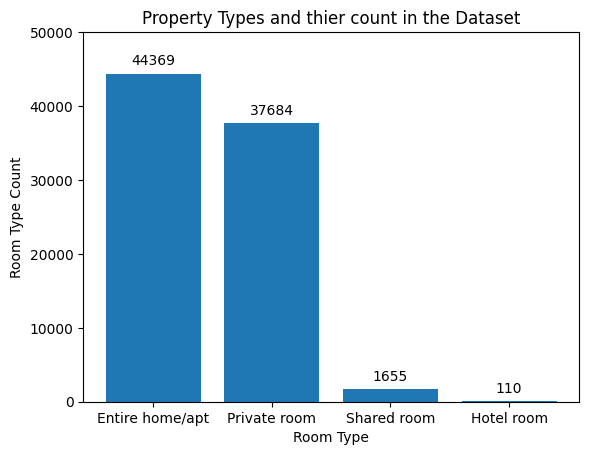

In [88]:
#Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"] );
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and thier count in the Dataset');


In [89]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34794
Manhattan,34741
Queens,11186
Bronx,2276
Staten Island,821


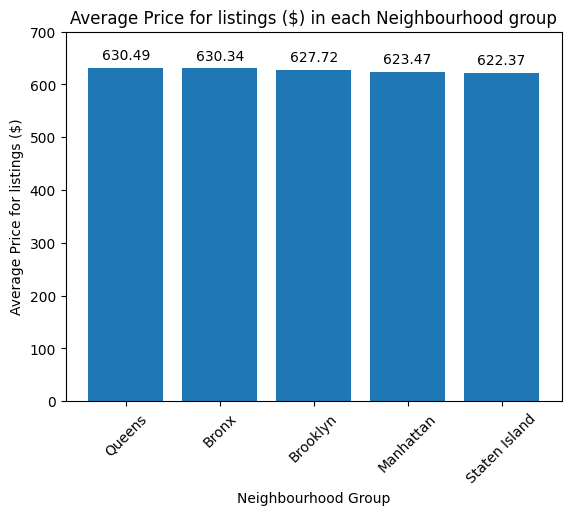

In [90]:
#Which neighbourhood has the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group' )['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding = 4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price for listings ($)');
plt.xticks(rotation = 45)
plt.title('Average Price for listings ($) in each Neighbourhood group');

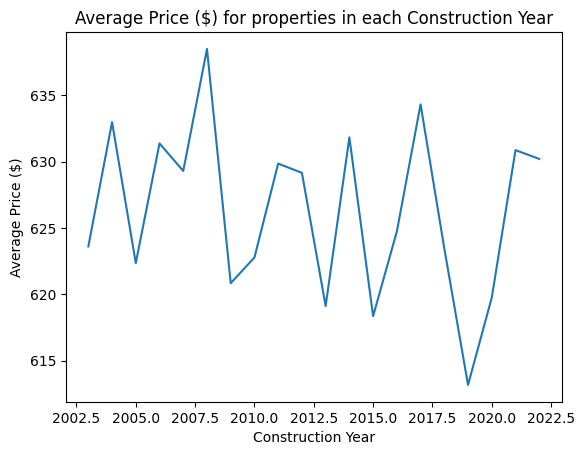

In [91]:
#Is there a relation between the construction year of property and price ?
df.groupby(df['Construction year'])['price_$'].mean().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for properties in each Construction Year');

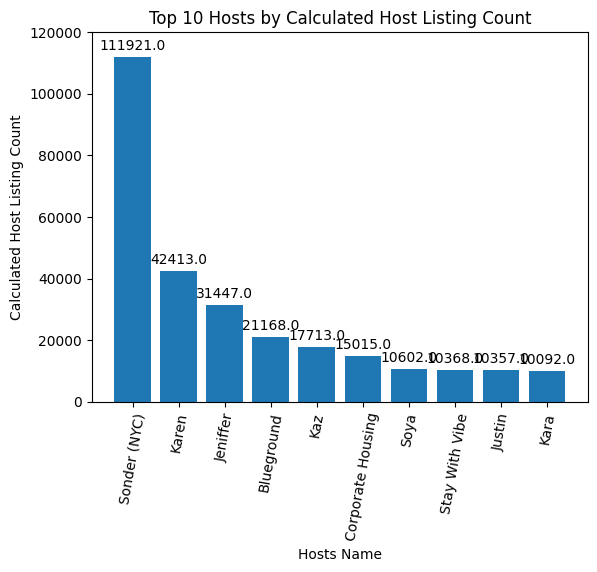

In [93]:
#Who are thr top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar, labels = hosts.loc[:,"calculated host listings count"], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listing Count');
plt.xticks(rotation = 80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Host Listing Count');

In [94]:
#Are hosts with verified identites more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283975
unconfirmed,3.273831


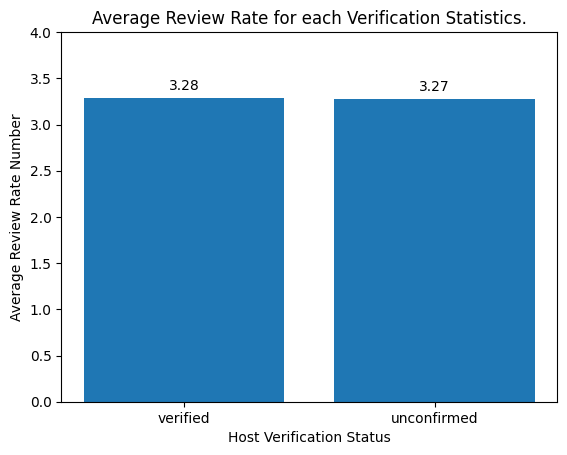

In [95]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

In [96]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909074778258)

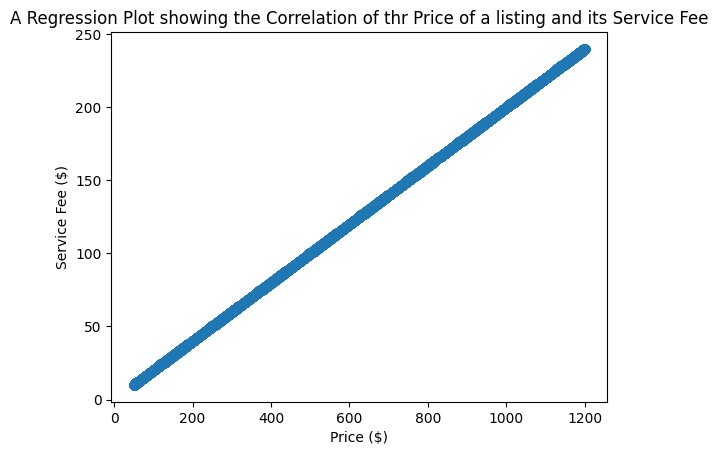

In [98]:
sns.regplot(df,x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of thr Price of a listing and its Service Fee');

In [99]:
# What is the average review rate number for listings , and does it vary based on the neighbourhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285801
                    Shared room                3.252976
Queens              Entire home/apt            3.347953
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

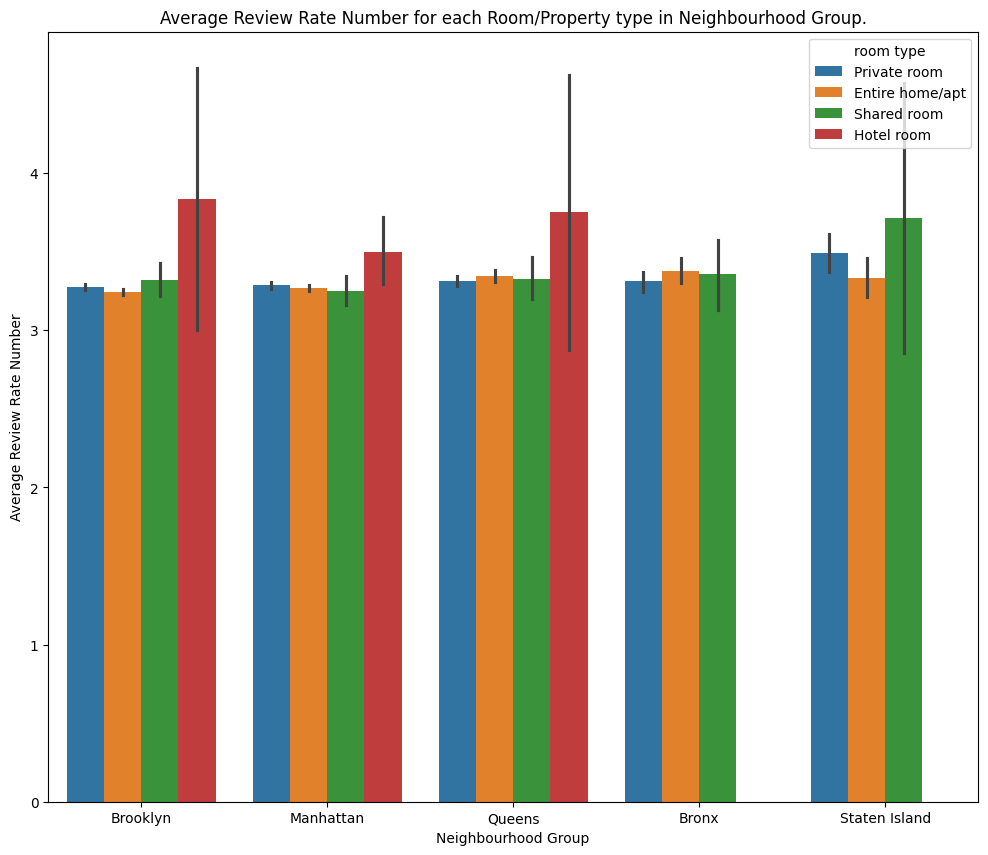

In [100]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each Room/Property type in Neighbourhood Group.');

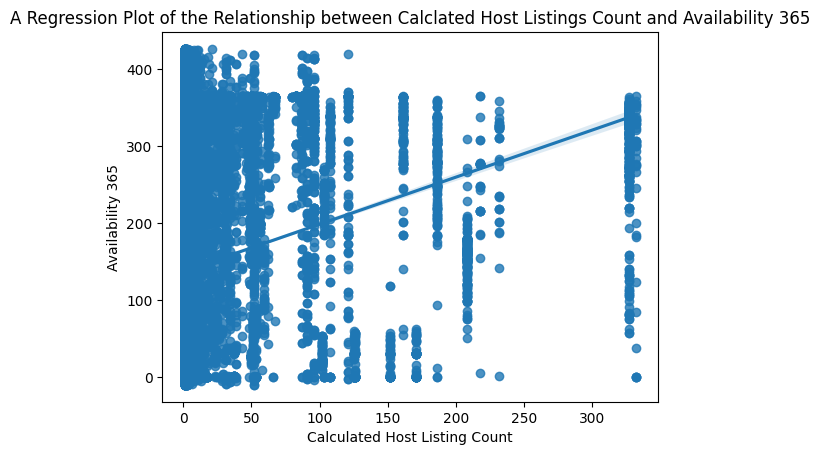

In [101]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availablethroughout the year?
sns.regplot(df,x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listing Count');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calclated Host Listings Count and Availability 365');

In [102]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13532575707935524)